In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import pathlib
import json
sns.set(font_scale=1.5, style='whitegrid')
pd.set_option('display.max.columns', 999)

output_dir = pathlib.Path("./report/")
output_dir.mkdir(parents=True, exist_ok=True)

# Evaluacion de estado de experimentos

In [67]:
is_path = "./data/is_experiments"
p = pathlib.Path(is_path)
ignore = ["test.csv"]
all_results = pd.DataFrame()
files = []
for i in p.glob('**/*.csv'):
    if not i.name  in (ignore):
        partial = pd.read_csv(i.absolute())
        partial['database'] = i.name.split("AllResults")[0]
        all_results = pd.concat([all_results, partial], ignore_index = True)
        files.append(i.name)
all_results['Total Time'] = all_results.timeLSH + all_results.timeIS
all_results['total'] = all_results.tp + all_results.tn + all_results.fn + all_results.fp
all_results['samples by bucket average (relative)'] = all_results.buckAvg/all_results.total*100.0
all_results['model_complexity'] =  all_results.trees*all_results.depth
all_results['Reduction of DataSet(%)'] = (1 - all_results['reduction'])*100.0

In [68]:
all_results.sort_values(by = 'samples by bucket average (relative)')

,instanceSelection,lshMEthod,sizeBucket,ands,ors,imbalance,neigh,subBuckets,distance,isMethod,trees,depth,type,k,tp,tn,fp,fn,sensibility,specificity,precision,accuracy,F1,Gmean,wtdAcc,AreaROC,timeLSH,timeIS,buckets,buckMax,buckMin,buckAvg,reduction,database,Total Time,total,samples by bucket average (relative),model_complexity,Reduction of DataSet(%)
18060,IS,projection,0.1,10,1,False,4,1000,6,entropy,25,10,Train,1,856.0,3626022.0,856.0,2145.0,28.523825,99.976398,50.0,99.917325,36.325058,53.401398,49.959597,0.995649,3.028876,1.903563,3627396.0,2361.0,1.0,1.108987,0.902130,p2p,4.932439,3629879.0,0.000031,250,9.786998
18832,IS,projection,0.1,10,1,False,4,1000,6,entropy,25,20,Train,4,2330.0,3623303.0,2330.0,749.0,75.673920,99.935735,50.0,99.915149,60.214498,86.962802,82.952465,0.998612,4.612612,3.652206,3624488.0,2519.0,1.0,1.109231,0.901998,p2p,8.264819,3628712.0,0.000031,500,9.800229
19126,IS,hyperplanes-projection,0.1,10,1,False,4,1000,6,entropy,50,20,Train,5,2294.0,3616221.0,2294.0,726.0,75.960265,99.936604,50.0,99.916610,60.304942,87.127555,83.153167,0.999247,6.756153,2.460565,3618414.0,1877.0,1.0,1.111559,0.899843,p2p,9.216718,3621535.0,0.000031,1000,10.015659
18858,IS,hyperplanes-projection,0.1,10,1,False,4,1000,6,entropy,50,30,Train,4,2987.0,3614397.0,2987.0,63.0,97.934426,99.917427,50.0,99.915756,66.201241,98.920958,98.529326,0.999323,4.634958,3.808909,3616126.0,3608.0,1.0,1.111796,0.899775,p2p,8.443867,3620434.0,0.000031,1500,10.022520
18584,IS,hyperplanes-projection,0.1,10,1,False,4,1000,6,entropy,50,10,Train,3,819.0,3613441.0,819.0,2237.0,26.799738,99.977340,50.0,99.915517,34.895611,51.762598,48.753019,0.995453,5.527002,2.626307,3614354.0,2267.0,1.0,1.112765,0.899197,p2p,8.153309,3617316.0,0.000031,500,10.080340
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15808,IS,hyperplanes,0.1,2,1,False,4,1000,6,drop3,10,10,Train,3,86.0,147.0,86.0,0.0,100.000000,63.090129,50.0,73.040752,66.666667,79.429295,88.927039,1.000000,0.066728,23.878071,4.0,90632.0,24257.0,56942.250000,0.001023,fraudk,23.944799,319.0,17850.235110,100,99.897703
15810,IS,hyperplanes,0.1,2,1,False,4,1000,6,drop3,10,20,Train,3,84.0,146.0,84.0,0.0,100.000000,63.478261,50.0,73.248408,66.666667,79.673246,89.043478,1.000000,0.080130,23.579809,4.0,94218.0,22145.0,56942.250000,0.001010,fraudk,23.659939,314.0,18134.474522,200,99.899021
16676,IS,hyperplanes,0.1,2,1,False,4,1000,6,drop3,10,30,Train,5,81.0,150.0,81.0,0.0,100.000000,64.935065,50.0,74.038462,66.666667,80.582296,89.480519,0.993902,0.074331,22.516251,4.0,86162.0,29798.0,56931.250000,0.001019,fraudk,22.590582,312.0,18247.195513,300,99.898123
16674,IS,hyperplanes,0.1,2,1,False,4,1000,6,drop3,10,20,Train,5,85.0,137.0,85.0,0.0,100.000000,61.711712,50.0,72.312704,66.666667,78.556802,88.513514,0.994186,0.064694,24.212395,4.0,94153.0,18291.0,56931.250000,0.000979,fraudk,24.277089,307.0,18544.381107,200,99.902100


In [42]:
assert (all_results.groupby('database')['lshMEthod'].apply(lambda x: pd.isnull(x).sum()).sum(), 0)

In [49]:
def checks_params(df, filen, isMethod, lshMEthod,imbalance, ifis='IS'):
    check = df[(df.database == filen.split("AllResults")[0]) & \
    (df.instanceSelection==ifis) & (df.isMethod == isMethod) & \
    (df.lshMEthod==lshMEthod) & (df.imbalance==imbalance)].groupby(['k', 'trees', 'depth', "ands", "ors"])['timeLSH'].count()

    assert(check[check.values!=2].sum(), 0)
    return(check)

checks = checks_params(all_results, "fraudkAllResults.csv", "entropy", "hyperplanes", False)
complete_aux_params = checks.reset_index()[['k', 'trees', 'depth', "ands", "ors"]].drop_duplicates()
complete_aux_params.to_csv(output_dir / "complete_aux_params.csv", index = False)

In [58]:
def checks_params_complete(df, filen, isMethod, lshMEthod,imbalance, ifis='IS'):

    auxs_params = ['k', 'trees', 'depth', "ands", "ors"]
    complete_aux_params= pd.read_csv(output_dir / "complete_aux_params.csv")
    complete_aux_params['aux'] = 1
    check = df[(df.database == filen.split("AllResults")[0]) & \
    (df.instanceSelection==ifis) & (df.isMethod == isMethod) & \
    (df.lshMEthod==lshMEthod) & (df.imbalance==imbalance)].groupby(auxs_params)['timeLSH'].count()
    if(check.shape[0]==0):
        m = f"** missing ALL experiments for file {filen}, {isMethod}, {lshMEthod}, imabalance = {imbalance}"
        #print(m)
        return(m,None)
    else:
        assert(check[check.values!=2].sum(), 0)
        check = pd.merge(check, complete_aux_params, how = 'right', on = auxs_params)
        if (check.timeLSH.isnull().sum()>0):
            m= f"**** missing AUX params for file {filen}, {isMethod}, {lshMEthod}, imabalance = {imbalance}"
            add_m = json.dumps(check[check.timeLSH.isnull()][auxs_params].to_dict(orient = "records"), indent=1, sort_keys=True)
            #print(m)
            #print (add_m)
            #print("****")
            return(m, add_m)
        else:
            m = f"*All OK!!!!! for {filen}, {isMethod},{lshMEthod}, {imbalance}"
            #print(m)
            return(m,None)

In [59]:
lshMEthods = ['hyperplanes', 'hyperplanes-projection', 'projection']
isMEthod = ['entropy','drop3']
combinations = [(x,y,z) for x in lshMEthods for y in files for z in isMEthod]

check_result = pd.DataFrame()
ii = 0 
for lsh, file_n, isM in combinations:
    meesage,add = checks_params_complete(all_results, file_n, isM, lsh, imbalance = False)
    partial = pd.DataFrame(data = {'lshMEthod': lsh, 'isMethod': isM, 
        'database': file_n.split("AllResults")[0], 'check_message':meesage, 'add_msj': add}, index = [ii]) 
    check_result = pd.concat([check_result,partial], ignore_index = True)
    ii+=1
check_result.sort_values(by = ['database', 'isMethod', 'lshMEthod'])

,lshMEthod,isMethod,database,check_message,add_msj
5,hyperplanes,drop3,fraudk,"*All OK!!!!! for fraudkAllResults.csv, drop3,h...",None
13,hyperplanes-projection,drop3,fraudk,**** missing AUX params for file fraudkAllResu...,"[\n {\n ""ands"": 8,\n ""depth"": 10,\n ""k"": 1,..."
21,projection,drop3,fraudk,**** missing AUX params for file fraudkAllResu...,"[\n {\n ""ands"": 8,\n ""depth"": 10,\n ""k"": 1,..."
4,hyperplanes,entropy,fraudk,"*All OK!!!!! for fraudkAllResults.csv, entropy...",None
12,hyperplanes-projection,entropy,fraudk,"*All OK!!!!! for fraudkAllResults.csv, entropy...",None
20,projection,entropy,fraudk,"*All OK!!!!! for fraudkAllResults.csv, entropy...",None
7,hyperplanes,drop3,p2p,** missing ALL experiments for file p2pAllResu...,None
15,hyperplanes-projection,drop3,p2p,** missing ALL experiments for file p2pAllResu...,None
23,projection,drop3,p2p,** missing ALL experiments for file p2pAllResu...,None
6,hyperplanes,entropy,p2p,**** missing AUX params for file p2pAllResults...,"[\n {\n ""ands"": 10,\n ""depth"": 20,\n ""k"": 2..."


In [60]:
lshMEthods = ['hyperplanes', 'hyperplanes-projection', 'projection']
isMEthod = ['entropy','drop3']
combinations = [(x,y,z) for x in lshMEthods for y in files for z in isMEthod if y!='susyAllResults.csv']

check_result = pd.DataFrame()
ii = 0 
for lsh, file_n, isM in combinations:
    meesage,add = checks_params_complete(all_results, file_n, isM, lsh, imbalance = True)
    partial = pd.DataFrame(data = {'lshMEthod': lsh, 'isMethod': isM, 
        'fileName': file_n, 'check_message':meesage, 'add_msj': add}, index = [ii]) 
    check_result = pd.concat([check_result,partial], ignore_index = True)
    ii+=1
check_result.sort_values(by = ['fileName', 'isMethod', 'lshMEthod'])

,lshMEthod,isMethod,fileName,check_message,add_msj
3,hyperplanes,drop3,fraudkAllResults.csv,"*All OK!!!!! for fraudkAllResults.csv, drop3,h...",None
9,hyperplanes-projection,drop3,fraudkAllResults.csv,"*All OK!!!!! for fraudkAllResults.csv, drop3,h...",None
15,projection,drop3,fraudkAllResults.csv,"*All OK!!!!! for fraudkAllResults.csv, drop3,p...",None
2,hyperplanes,entropy,fraudkAllResults.csv,"*All OK!!!!! for fraudkAllResults.csv, entropy...",None
8,hyperplanes-projection,entropy,fraudkAllResults.csv,"*All OK!!!!! for fraudkAllResults.csv, entropy...",None
14,projection,entropy,fraudkAllResults.csv,"*All OK!!!!! for fraudkAllResults.csv, entropy...",None
5,hyperplanes,drop3,p2pAllResults.csv,** missing ALL experiments for file p2pAllResu...,None
11,hyperplanes-projection,drop3,p2pAllResults.csv,** missing ALL experiments for file p2pAllResu...,None
17,projection,drop3,p2pAllResults.csv,** missing ALL experiments for file p2pAllResu...,None
4,hyperplanes,entropy,p2pAllResults.csv,** missing ALL experiments for file p2pAllResu...,None


## Comparacion entre metodos desde el punto de vista  del numero de cubetas

In [73]:
def plotBuckets(df, col = 'imbalance', style = 'lshMEthod' , y = 'buckets',  x = 'ands', logy = True, logx=False, row=None):
    fil = (df.instanceSelection == 'IS') & (df.type == 'Train')

    df_pb_to_plot = df[fil].copy()
    
    plot = sns.relplot(x=x, y=y, col = col, height = 6, aspect=2,
                   data=df_pb_to_plot, kind="line",ci=10, row =row,
                   palette='hls', style = style, linewidth=3.5, 
                       hue = style,facet_kws={'sharey': False, 'sharex': True})
    if logy:
        plot.set(yscale="log")
    if logx:
        plot.set(xscale="log")

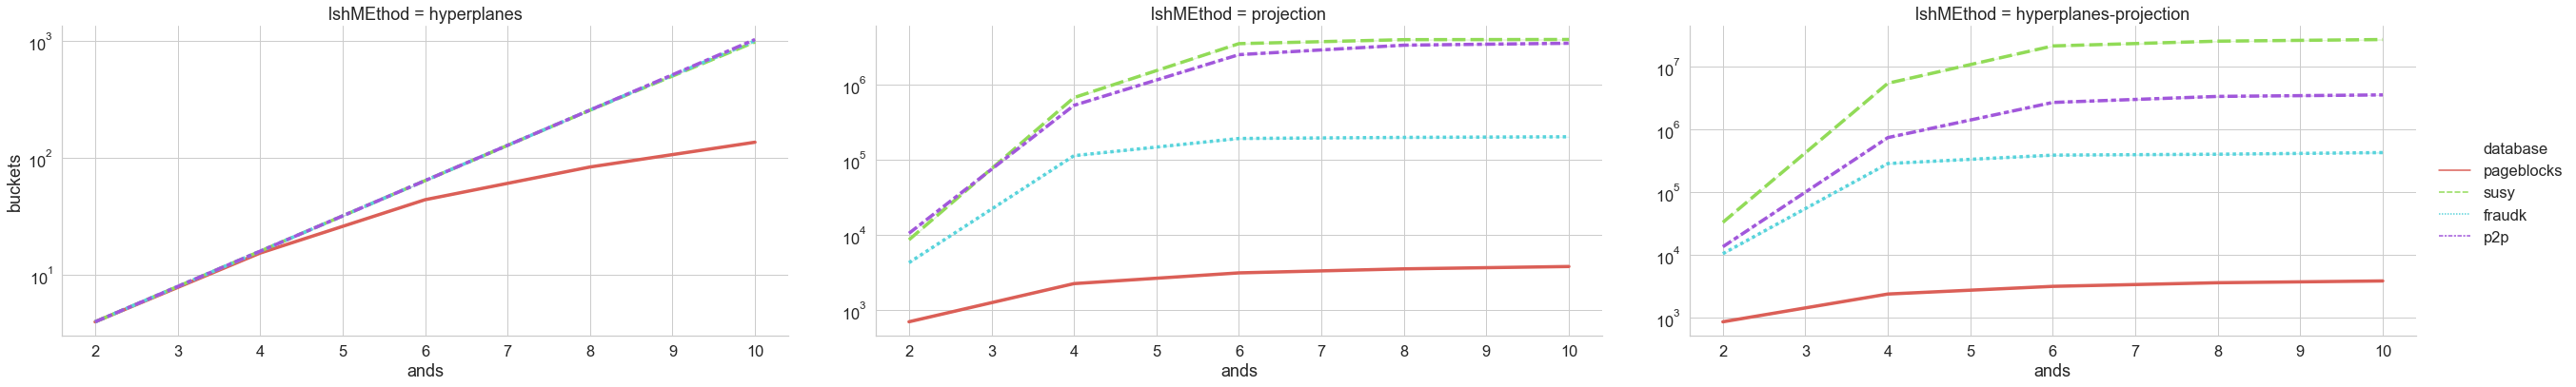

In [62]:
plotBuckets(all_results[all_results.imbalance==False], col = 'lshMEthod', style = 'database')

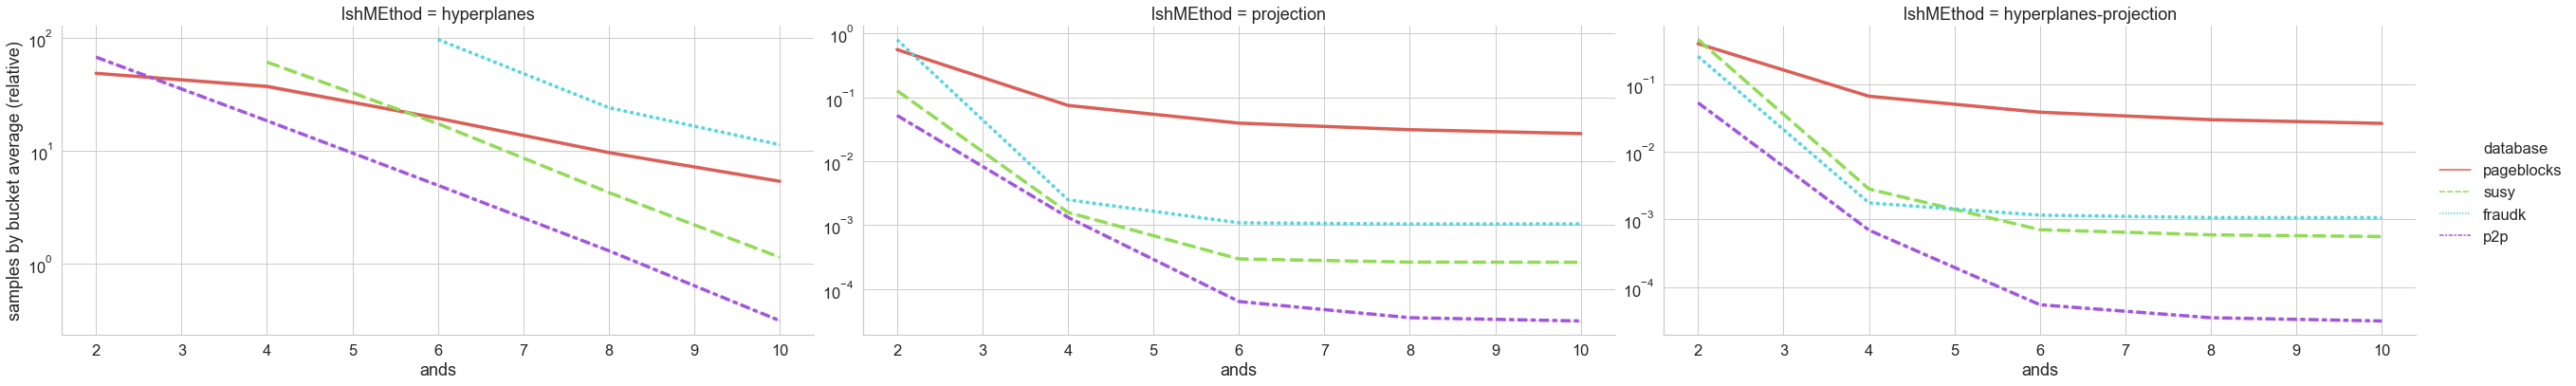

In [65]:
plotBuckets(all_results[(all_results.imbalance==False) & 
(all_results['samples by bucket average (relative)'] <= 100)],
col = 'lshMEthod', style = 'database',
y='samples by bucket average (relative)', x = 'ands',  logy = True, logx= False)

usando el metodo de hiperplanos, el aumento de los buckets es mas estable en relacion con el el numero de ands. el metodo de la distribuciones p-estables crear mucho mas buckets por numero ands. Al combinar los dos metodos, se logran la creacion de aun mas buckets por cada ands. Para los metodos de la distribucion p-estable y la cambinacion de hiperplanos y p-estables, se observa que despues 6 ands el numero de buckets tiende a estabilizarse.

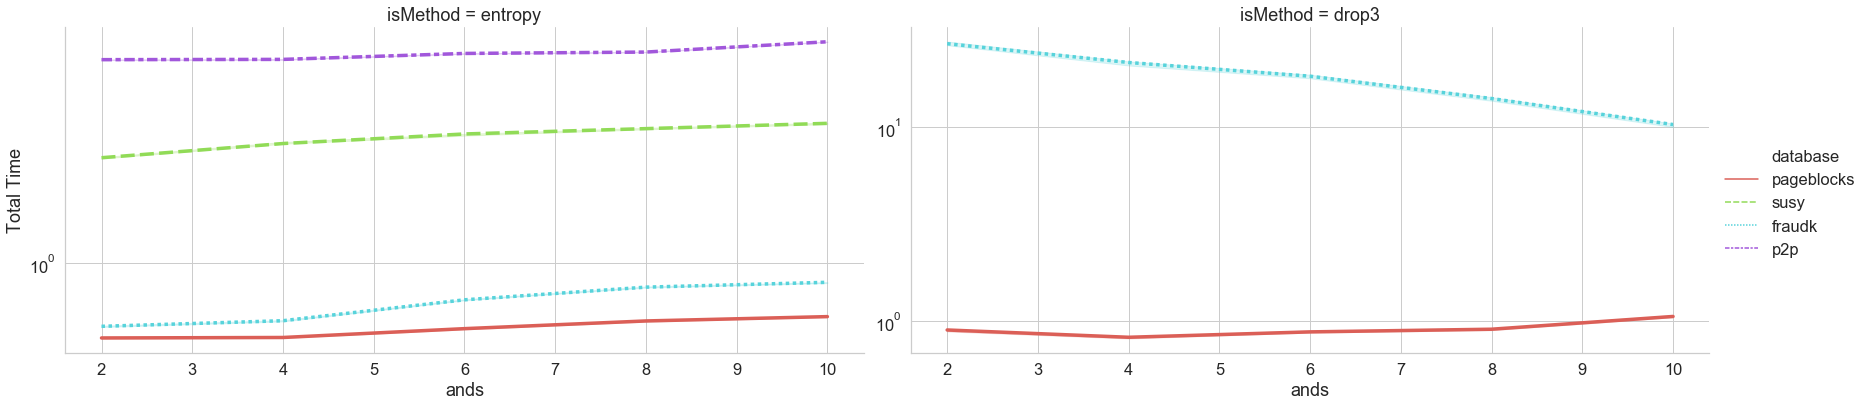

In [66]:
plotBuckets(all_results[all_results.imbalance==False], col = 'isMethod', style = 'database', y='Total Time', logy = True)

Al comprar como impacta el numero de ands y por consecuente el numero de buckets que algoritmo debe procesar a la hora de realizar la seleccion de instancias, se observa que sin importar el metodo de LSH, el metodo de seleccion de instancias por medio de la entropia tiene un tiempo de procesamiento que no es influenciado fuertemete por el metodo de LSH. En drop3, el tiempo de procesamiento depende del numero de ands, pero se comienza a estabilizar despues de 4 ands, lo que coincide que el drop3 es totalmente influenciado por el numero de muestras

## Comparacion entre metodos desde el punto de vista  de la reducciòn

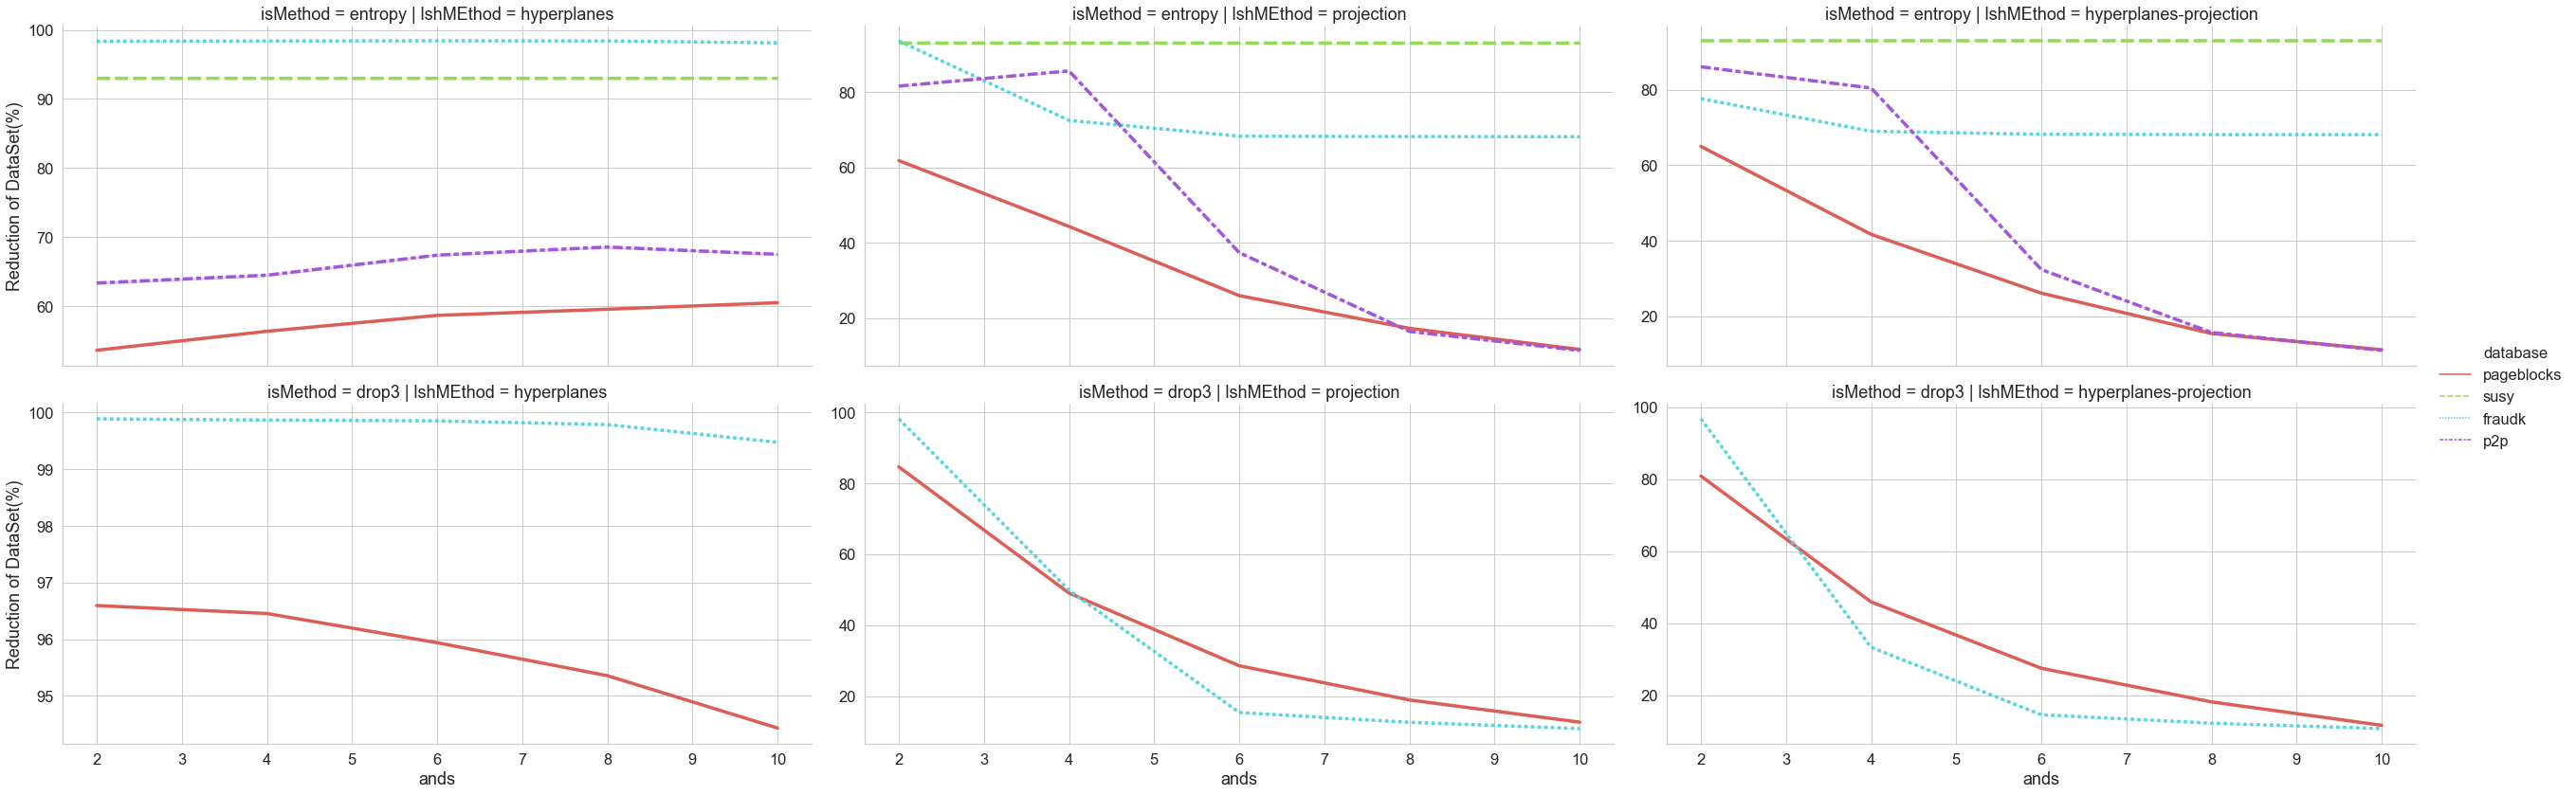

In [75]:
plotBuckets(all_results[all_results.imbalance==False], row = 'isMethod',  col = 'lshMEthod',  style = 'database', y='Reduction of DataSet(%)', logy = False)

### Comparacion entre metodos desde el punto de vista del performances

In [116]:
all_results['total'] = all_results.tp + all_results.tn + all_results.fn + all_results.fp
all_results[(all_results.file.isin(['p2pAllResults.csv']) ) & (all_results.instanceSelection == 'IS') & (all_results.type == 'Train') & (all_results.total>1779103)][]

,instanceSelection,lshMEthod,sizeBucket,ands,ors,imbalance,neigh,subBuckets,distance,isMethod,trees,depth,type,k,tp,tn,fp,fn,sensibility,specificity,precision,accuracy,F1,Gmean,wtdAcc,AreaROC,timeLSH,timeIS,buckets,buckMax,buckMin,buckAvg,reduction,file,total
17946,IS,projection,0.1,6,1,False,4,1000,6,entropy,10,10,Train,1,888.0,2507495.0,888.0,2015.0,30.589046,99.964599,50.0,99.884402,37.956828,55.297574,51.401712,0.987511,2.913263,1.803684,2504028.0,1893.0,1.0,1.606506,0.624058,p2pAllResults.csv,2511286.0
17948,IS,projection,0.1,6,1,False,4,1000,6,entropy,10,20,Train,1,2241.0,2308862.0,2241.0,627.0,78.138075,99.903033,50.0,99.876057,60.979592,88.352876,84.667563,0.999641,2.882470,1.700143,2304298.0,3003.0,1.0,1.745753,0.574666,p2pAllResults.csv,2313971.0
17950,IS,projection,0.1,6,1,False,4,1000,6,entropy,10,30,Train,1,2480.0,2401994.0,2480.0,303.0,89.112469,99.896859,50.0,99.884391,64.057859,94.350706,92.347786,0.998931,2.794926,1.707057,2394849.0,2248.0,1.0,1.679745,0.597798,p2pAllResults.csv,2407257.0
17952,IS,projection,0.1,6,1,False,4,1000,6,entropy,25,10,Train,1,840.0,2491004.0,840.0,2034.0,29.227557,99.966290,50.0,99.884797,36.890646,54.053404,50.449177,0.991395,3.010658,1.770754,2487664.0,3245.0,1.0,1.617073,0.619949,p2pAllResults.csv,2494718.0
17954,IS,projection,0.1,6,1,False,4,1000,6,entropy,25,20,Train,1,2213.0,2678075.0,2213.0,613.0,78.308563,99.917434,50.0,99.894675,61.031440,88.455586,84.791225,0.999209,2.847802,1.684873,2674955.0,3511.0,1.0,1.503851,0.666438,p2pAllResults.csv,2683114.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19120,IS,hyperplanes-projection,0.1,10,1,False,4,1000,6,entropy,25,20,Train,5,2260.0,3595244.0,2260.0,740.0,75.333333,99.937179,50.0,99.916678,60.106383,86.767510,82.714487,0.999014,7.347282,2.418262,3596506.0,1646.0,1.0,1.118330,0.894623,p2pAllResults.csv,3600504.0
19122,IS,hyperplanes-projection,0.1,10,1,False,4,1000,6,entropy,25,30,Train,5,2873.0,3534064.0,2873.0,109.0,96.344735,99.918772,50.0,99.915761,65.834097,98.115481,97.416946,0.998769,6.781217,3.601663,3535305.0,1961.0,1.0,1.137690,0.879408,p2pAllResults.csv,3539919.0
19124,IS,hyperplanes-projection,0.1,10,1,False,4,1000,6,entropy,50,10,Train,5,840.0,3576691.0,840.0,2198.0,27.649770,99.976520,50.0,99.915153,35.608309,52.576875,49.347795,0.994393,4.276837,3.825733,3578293.0,1332.0,1.0,1.124023,0.890021,p2pAllResults.csv,3580569.0
19126,IS,hyperplanes-projection,0.1,10,1,False,4,1000,6,entropy,50,20,Train,5,2294.0,3616221.0,2294.0,726.0,75.960265,99.936604,50.0,99.916610,60.304942,87.127555,83.153167,0.999247,6.756153,2.460565,3618414.0,1877.0,1.0,1.111559,0.899843,p2pAllResults.csv,3621535.0


In [80]:
def general_plot(df, col = 'imbalance', style = 'lshMEthod' , y = 'buckets',  x = 'ands', logy = True, logx=False, row=None):

    df_pb_to_plot = df.copy()
    
    plot = sns.relplot(x=x, y=y, col = col, height = 6, aspect=2,
                   data=df_pb_to_plot, kind="line",ci=10, row =row,
                   palette='hls', style = style, linewidth=3.5, 
                       hue = style,facet_kws={'sharey': False, 'sharex': True})
    if logy:
        plot.set(yscale="log")
    if logx:
        plot.set(xscale="log")

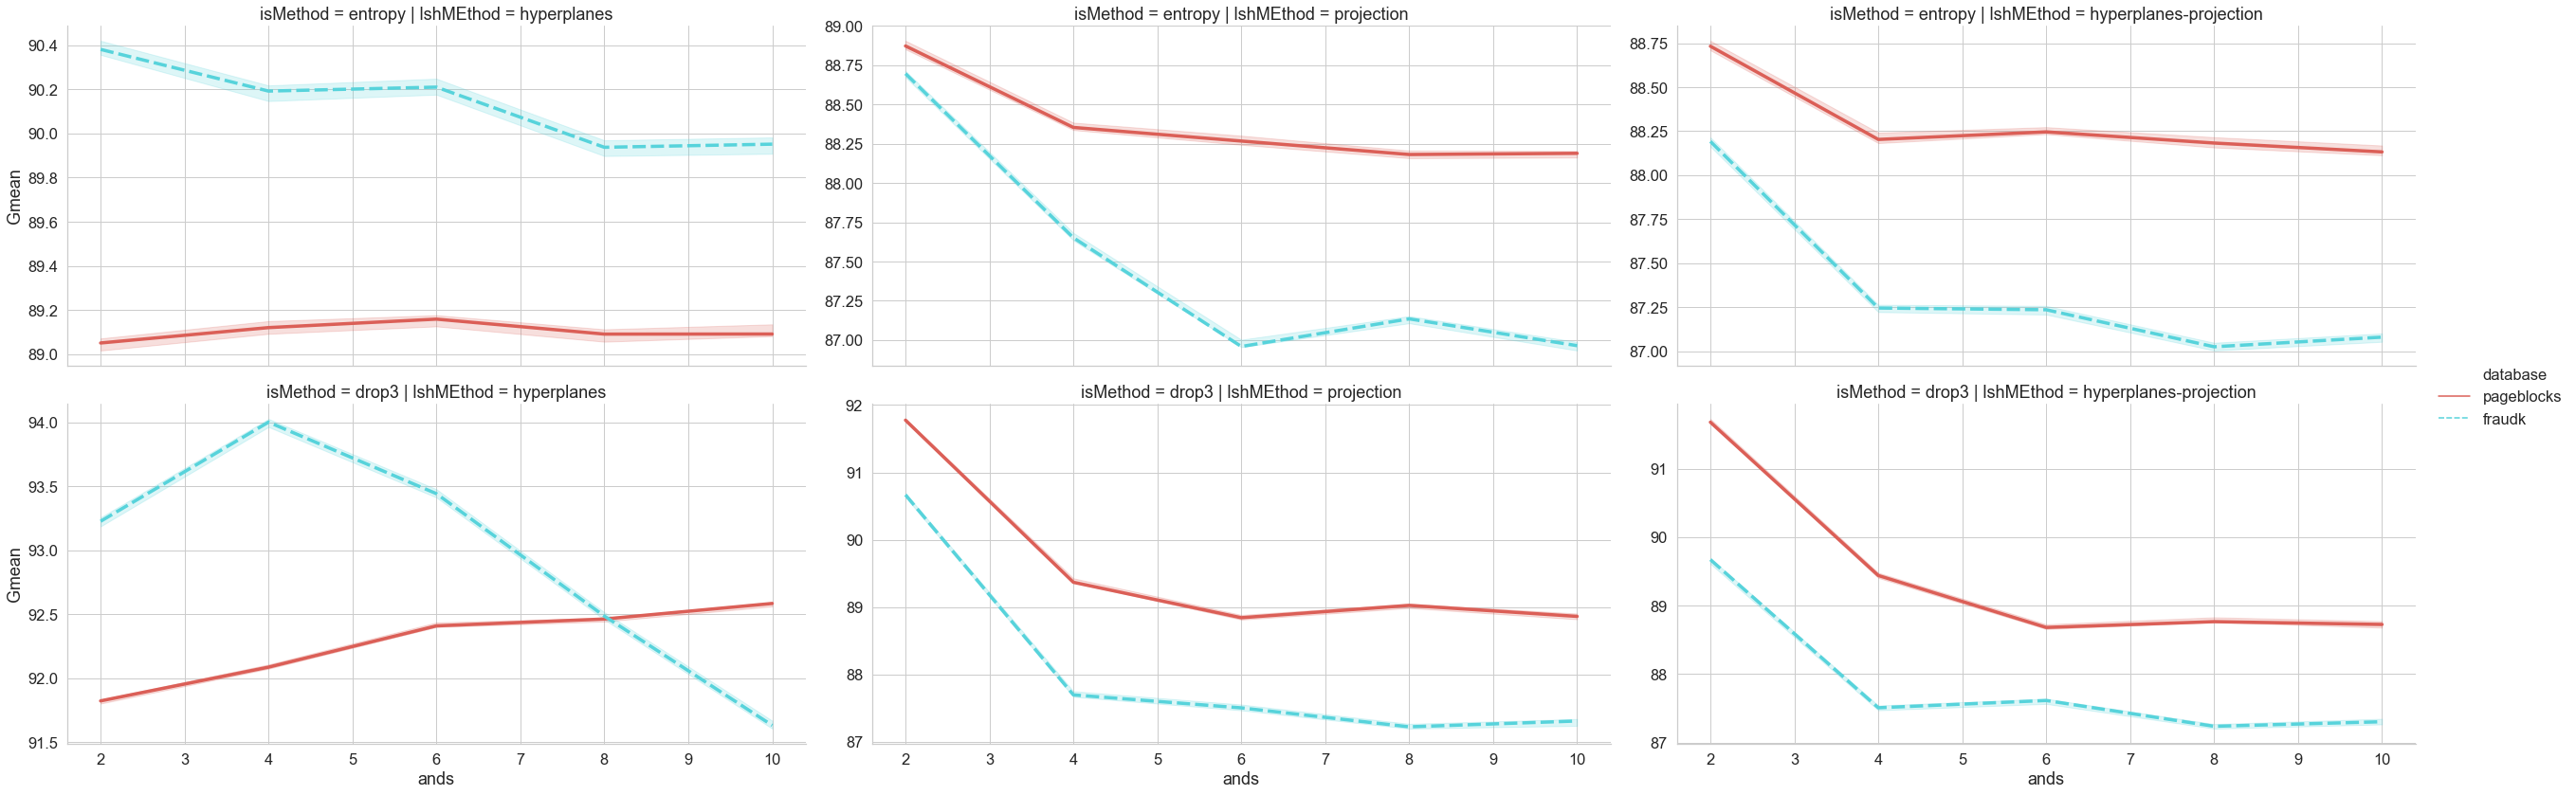

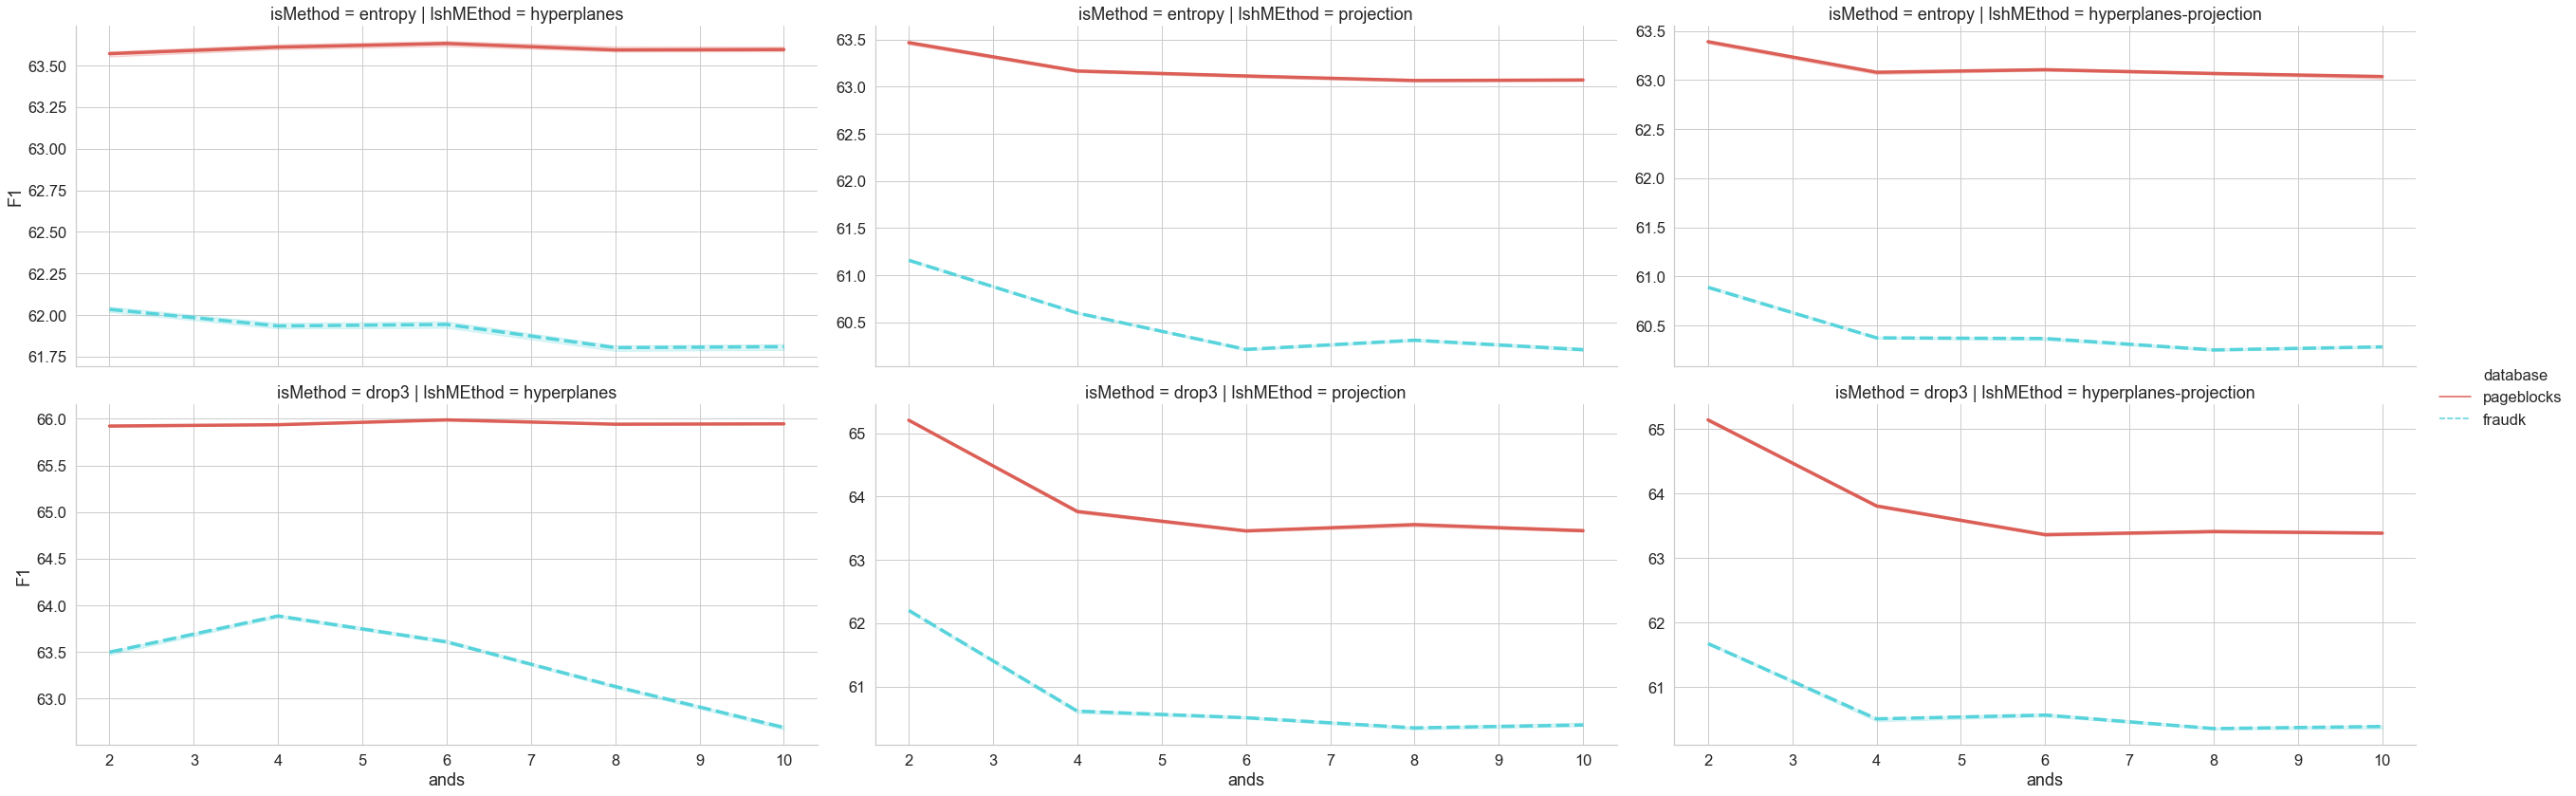

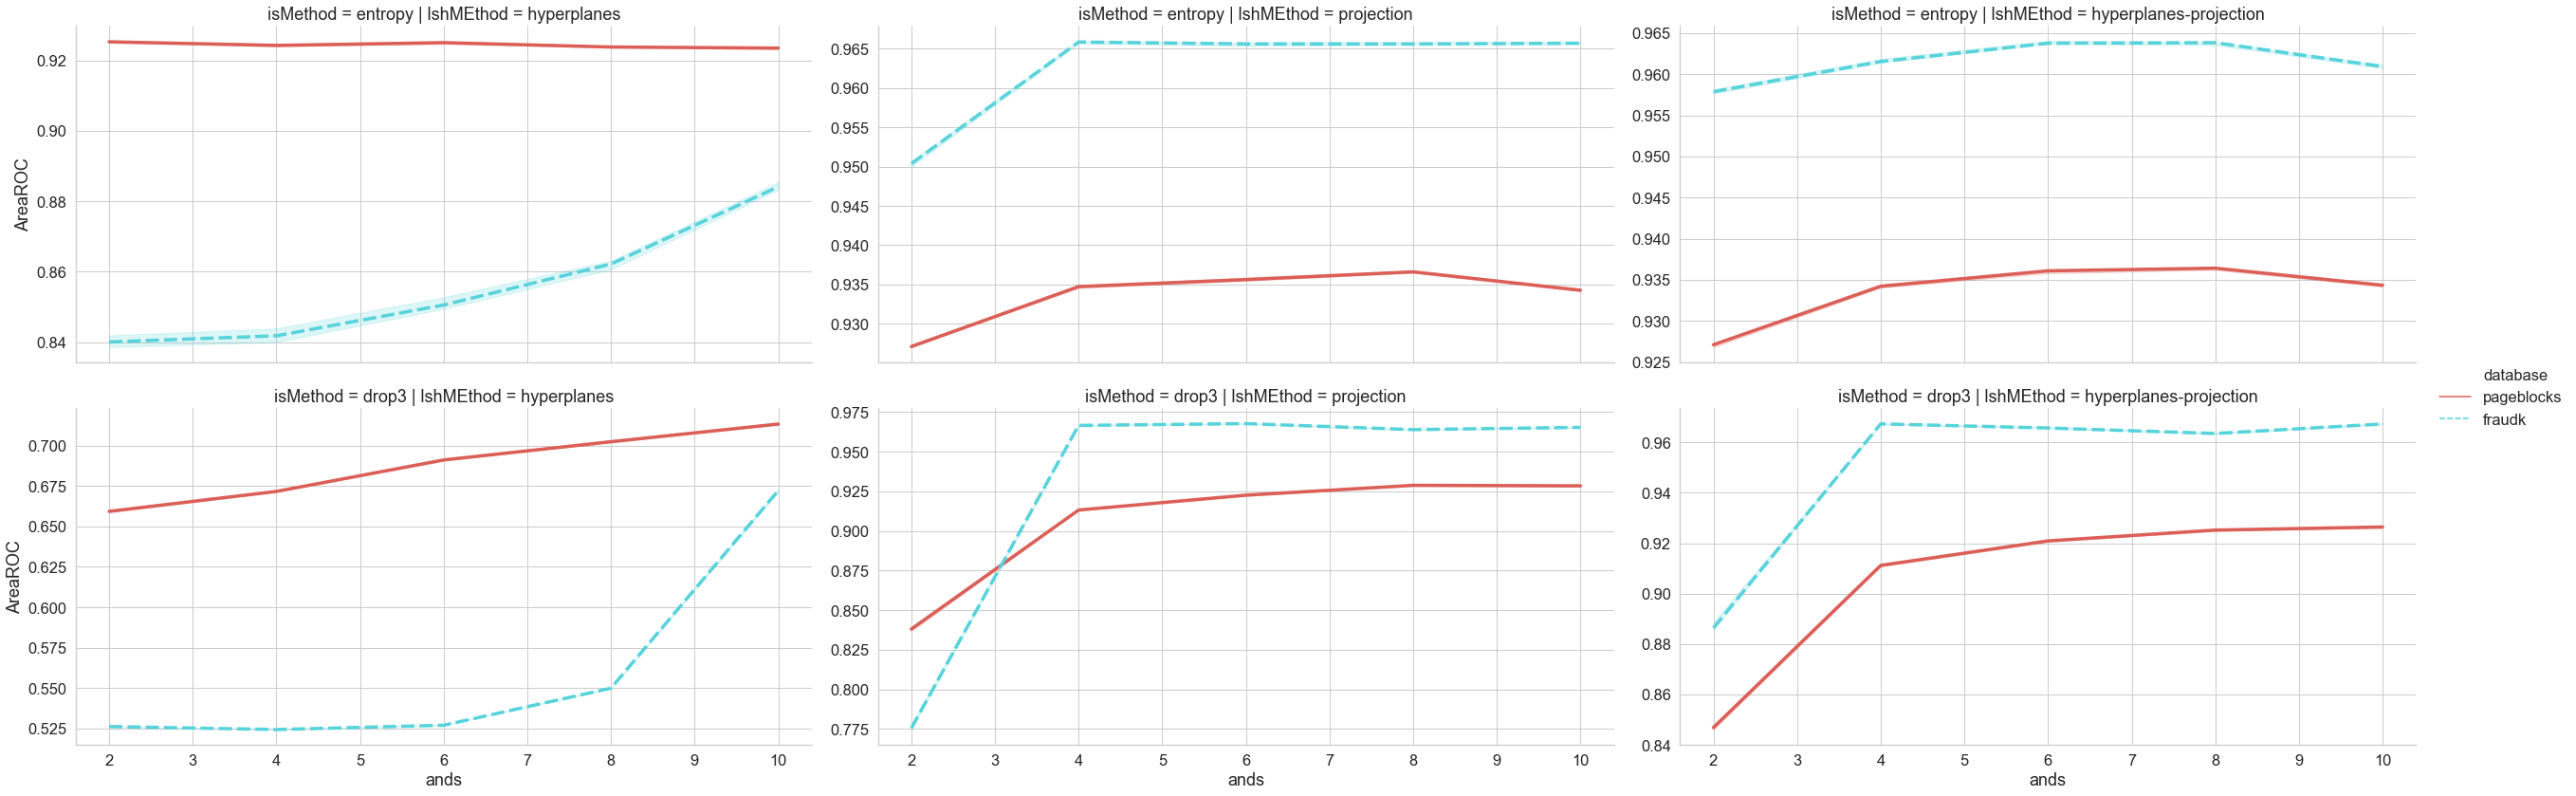

In [81]:
fil = (all_results ['type'] == 'Test') & (all_results.imbalance==True ) & (~all_results.database.isin(['susy']))

general_plot(all_results[fil], row = 'isMethod',  col = 'lshMEthod',  style = 'database', y='Gmean', logy = False)

general_plot(all_results[fil], row = 'isMethod',  col = 'lshMEthod',  style = 'database', y='F1', logy = False)

general_plot(all_results[fil], row = 'isMethod',  col = 'lshMEthod',  style = 'database', y='AreaROC', logy = False)


In [ ]:
fil = (all_results ['type'] == 'Test') & (all_results.imbalance==True ) & (~all_results.database.isin(['susy']))

general_plot(all_results[fil], row = 'isMethod',  col = 'lshMEthod',  style = 'database', y='Gmean', logy = False)

general_plot(all_results[fil], row = 'isMethod',  col = 'lshMEthod',  style = 'database', y='F1', logy = False)

general_plot(all_results[fil], row = 'isMethod',  col = 'lshMEthod',  style = 'database', y='AreaROC', logy = False)


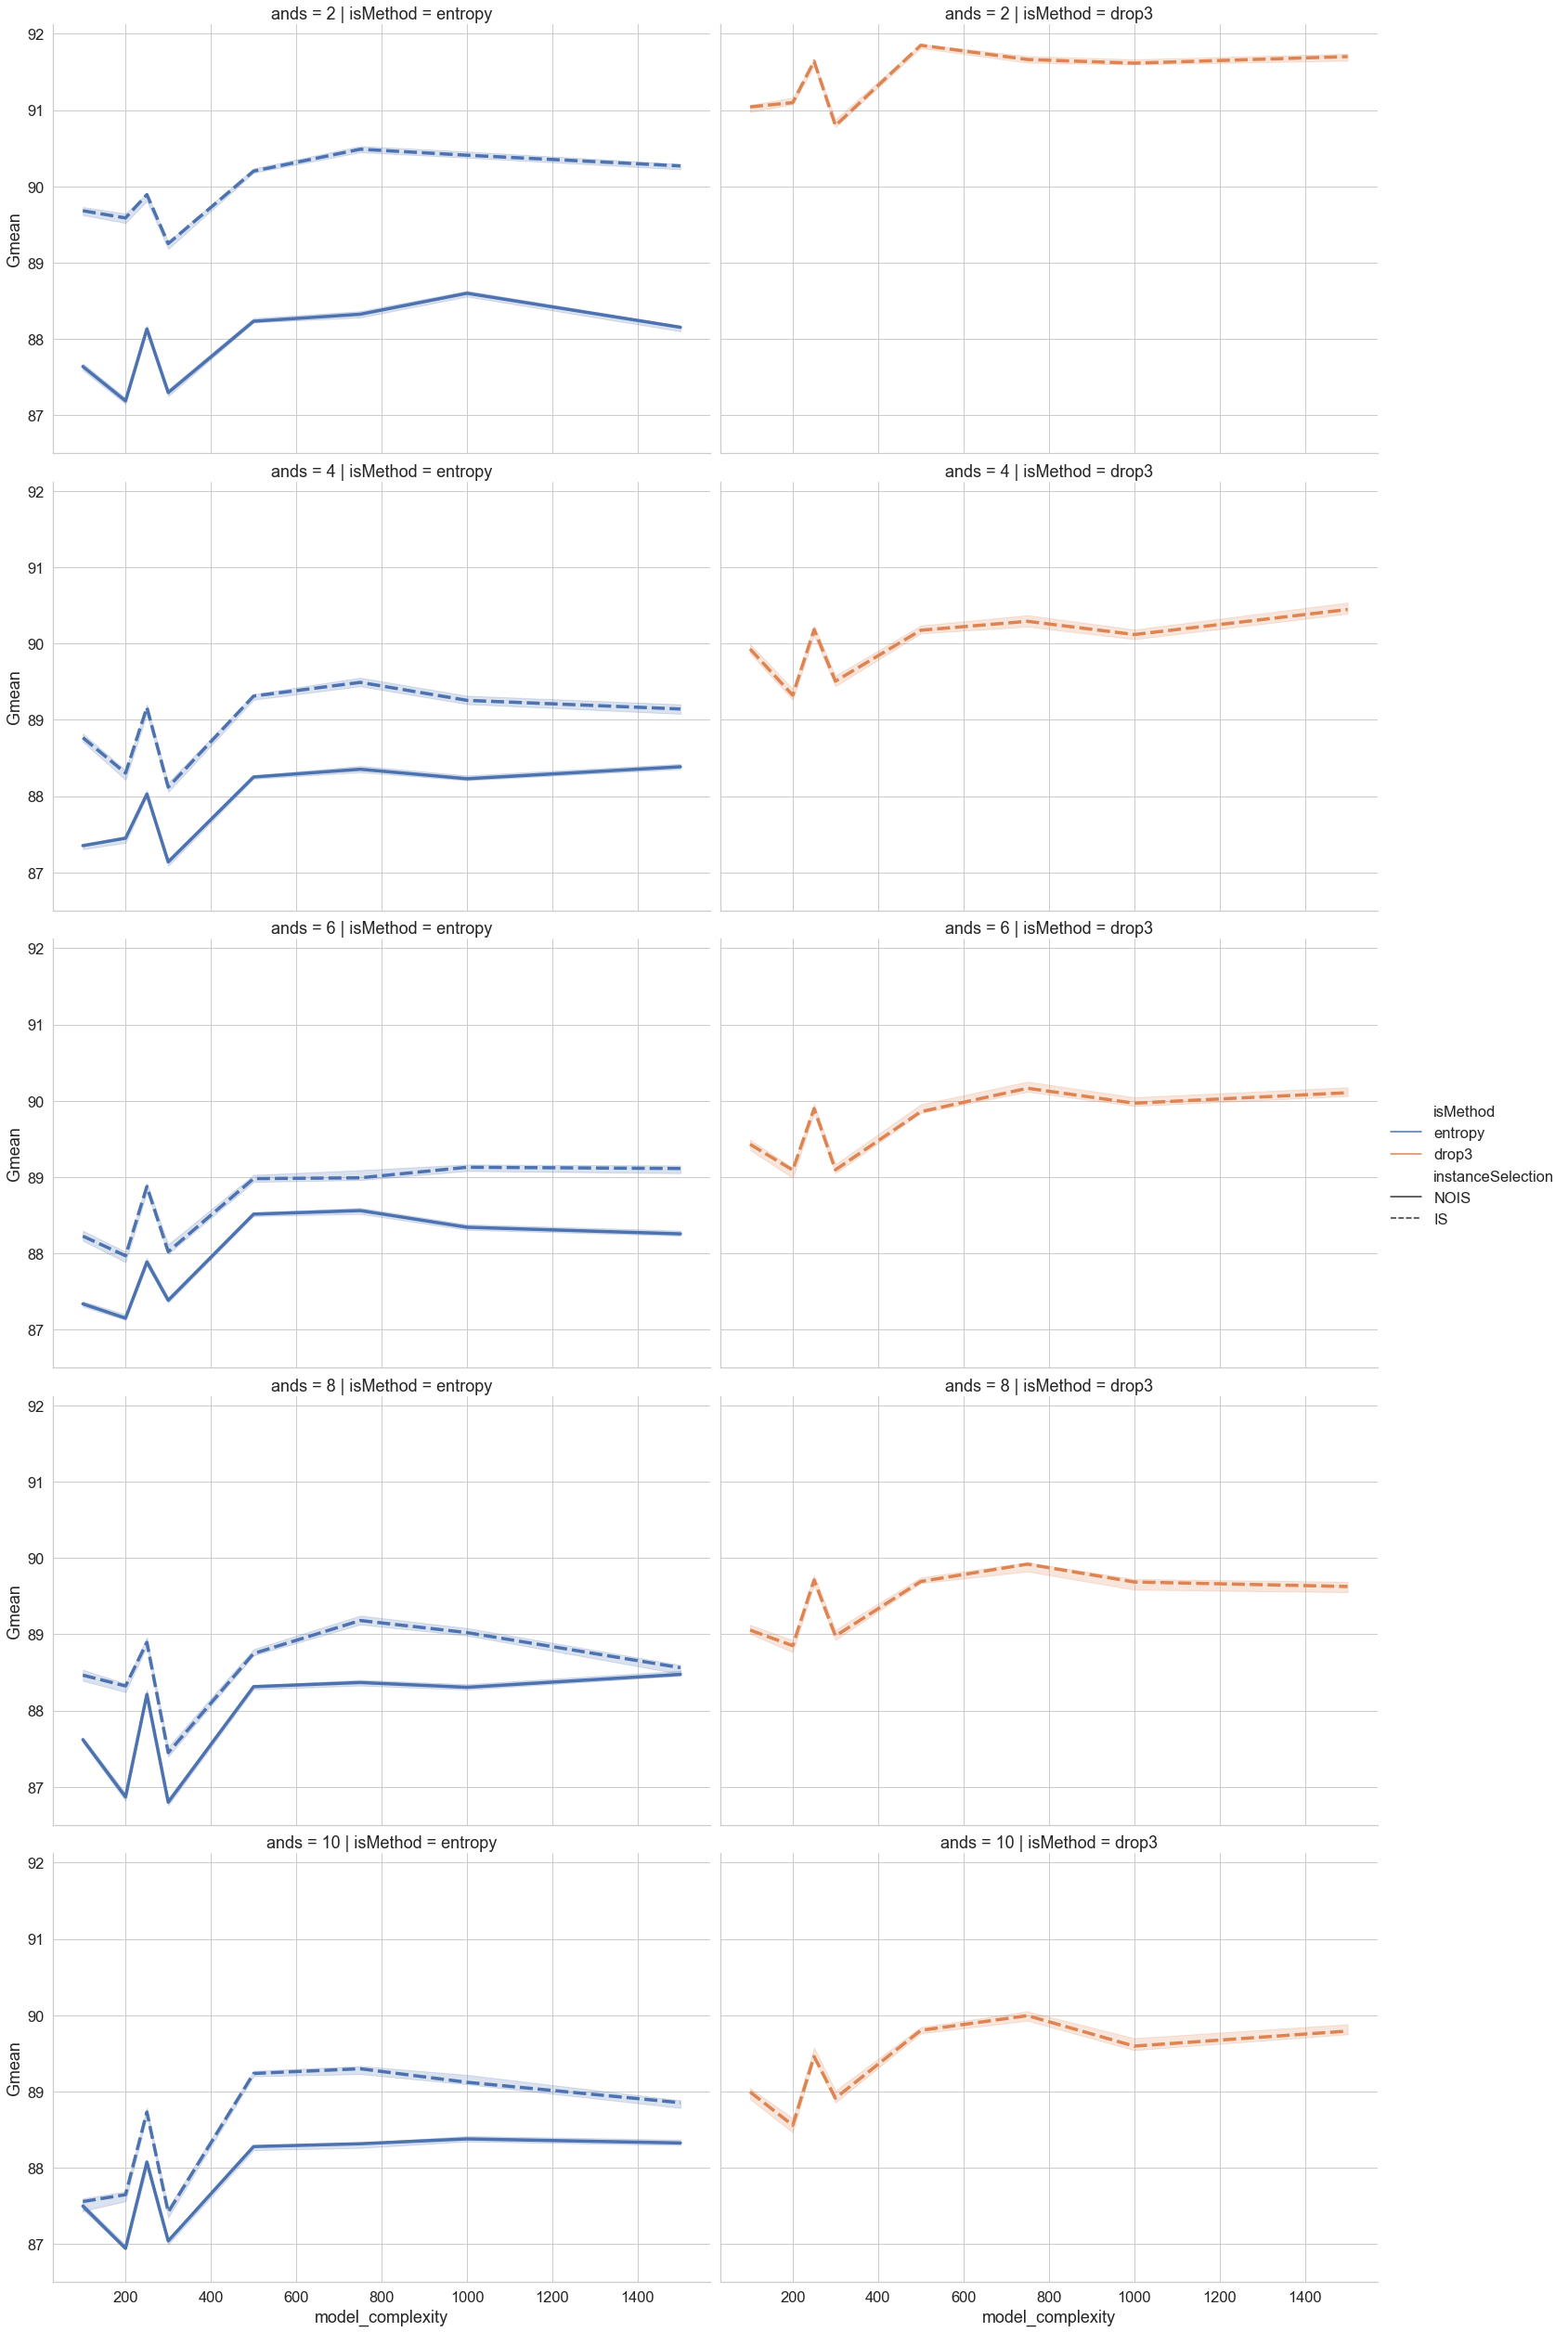

In [220]:
fil = (all_results ['type'] == 'Test') & (all_results.imbalance==True ) & (~all_results.file.isin(['susyAllResults.csv']))
plot = sns.relplot(x="model_complexity", y="Gmean", height = 7, aspect=1.5, 
                    data=all_results[fil], 
                       kind="line",ci=10, style = 'instanceSelection', 
                       linewidth=3.5, hue = 'isMethod', col = 'isMethod', row = 'ands')

In [84]:
fil = (all_results ['type'] == 'Test') & (all_results.imbalance==False )

general_plot(all_results[fil], row = 'isMethod',  col = 'lshMEthod',  style = 'database', y='Gmean', logy = False)

general_plot(all_results[fil], row = 'isMethod',  col = 'lshMEthod',  style = 'database', y='F1', logy = False)

general_plot(all_results[fil], row = 'isMethod',  col = 'lshMEthod',  style = 'database', y='AreaROC', logy = False)


In [ ]:
lshMEthods = ['hyperplanes', 'hyperplanes-projection', 'projection']
isOrNis = ['IS', 'NOIS']
isMEthod = ['entropy','drop3']
combinations = [(x,y,z) for x in lshMEthods for y in isOrNis for z in isMEthod]

def completeIS(dfToComplete):
    
    combinations = [(x,y,z) for x in lshMEthods for y in isOrNis for z in isMEthod]
    
    for lsh, isOrNis, isM in combinations:
        print(lsh, isOrNis, isM)
        
        